In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
import os

In [2]:
def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


In [3]:
# Plotting an individual Es layer identified by Tasha's algorithm
### S U M M E R ###
WACCM_data_alt = '90-150km'
run_type = 'SMax'

# filename_append = '1sigma_3xMpza_1xpeak'
# criteria_label = 'A'

# filename_append = '0.5sigma_1xMpza_2xpeak'
# criteria_label = 'G'

# filename_append = '0.5sigma_1xMpza_1xpeak'
# criteria_label = 'H'

filename_append = '0.25sigma_2xMpza_1xpeak'
criteria_label = 'I'

# filename_append = '0sigma_1xMpza_1xpeak'
# criteria_label = 'M'

# filename_append = '0sigma_0.5xMpza_0.5xpeak'
# criteria_label = 'N'

## Change the current working directory to where you want to start searching
os.chdir('/resstore')
file = f'b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Dec-Feb_90-150km_{filename_append}.nc'

ds_sum = xr.open_dataset(file, decode_times = False)
ds_sum

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 12.0 1.0 2.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

In [4]:
lev_sl = ds_sum.variables['lev_sl']
lat = ds_sum.variables['lat']
intlat = ds_sum.variables['latsl']
lon = ds_sum.variables['lon']
LT = ds_sum.variables['LT']
LT_L = ds_sum.variables['LT_L']

Zavg_sl = ds_sum.variables['Zavg_sl']
altavg_sl = ds_sum.variables['altavg_sl']

times_str_min = ds_sum.variables['times_str_min']
times_str_max = ds_sum.variables['times_str_max']

SpEs = ds_sum['SpEs'] #(25, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

In [5]:
desired_altitude_km = 100.0
desired_alt_km = '100'

# Find the index of the closest altitude in geopH
closest_altitude_index = np.abs(altavg_sl - desired_altitude_km).argmin(dim='lev_sl')

SpEsns_sl = SpEsns.isel(lev_sl=closest_altitude_index)  #SpEsns=(lev_sl, time, lat, lon, timesl, mth)
Mptdensns_sl = Mptdensns.isel(lev_sl=closest_altitude_index)

# Change time and date below

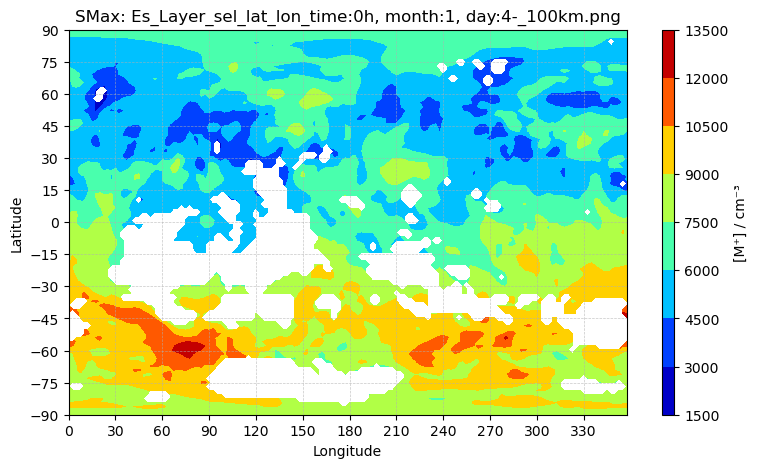

In [6]:
year = 2023 # {yyyy}
month = 1 # {mm}
day = 4 # {d}
time = 0 # {hh}
plotdatetime = f'time:{time}h, month:{month}, day:{day}-'

SpEsns_plot = SpEsns_sl[time, :, :, 0, month] #time, lat, lon, timesl, month   select time of first 2wk period of first month 


fig, ax = plt.subplots(figsize=(9,5))

# makes contour plot and formats bar on the side 
contour = ax.contourf(lon, lat, SpEsns_plot, cmap='jet')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('[M⁺] / cm⁻³')

# set y ticks (latitude) every 15 degrees
ax.set_yticks(np.arange(-90, 91, 15))
ax.set_ylabel('Latitude')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set x ticks (longitude) every 30 degrees
ax.set_xticks(np.arange(0,360, 30))
ax.set_xlabel('Longitude')

figname = f'Es_Layer_sel_lat_lon_{plotdatetime}_{desired_alt_km}km.png'
ax.set_title(f'{run_type}: {figname}')

# plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()

# For a given location:


In [7]:
Esmin = 0  
Esmax = 24  

#Select data : 24h period, lev,lat,lon. (First month and 2wk period of that month)
Mptdensns_sl = Mptdensns[:,Esmin:Esmax,:,:,0,0]      #(19, 24, 96, 144)
SpEsns_sl = SpEsns[:,Esmin:Esmax,:,:,0,0]

targetlat1 = -60
targetlon1 = 78

#Select
Mptdensns_sel1 = Mptdensns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')    #(19,24)
SpEsns_sel1 = SpEsns_sl.sel(lat=targetlat1, lon=targetlon1, method='nearest')

In [9]:
hr = 7   #starting UT index
timezoneshift = -3     
starthr = hr+timezoneshift   #starting local time

start_date = datetime(year, month, day, starthr)


num_days = 1  
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

vmin = 1e-1
vmax = 1e5

num_levels = 17

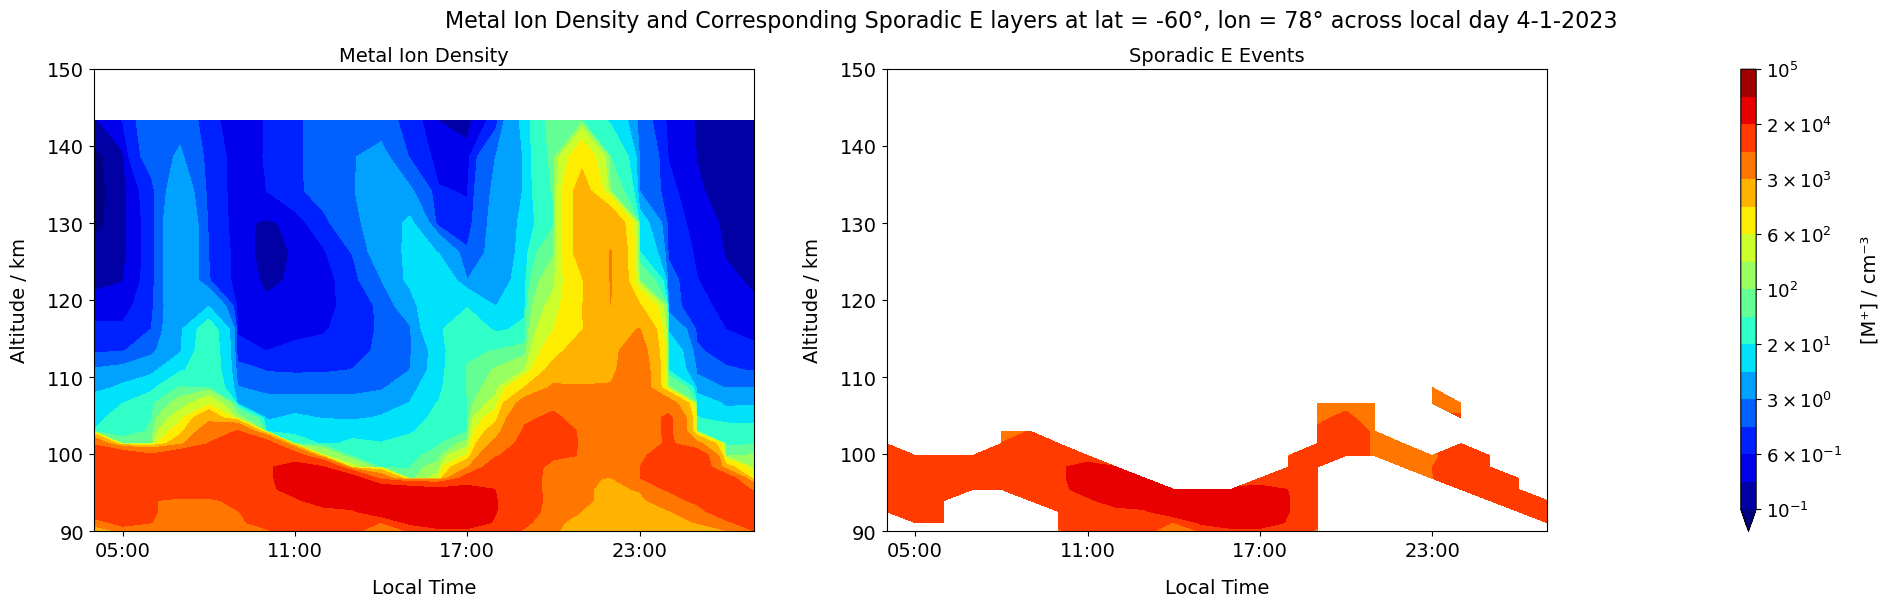

In [10]:
# create two plots and fill them with [M+] and Es 

fig, axes = plt.subplots(1, 2, figsize=(25, 6))

contour = axes[0].contourf(UT_Plot, Zavg_sl, Mptdensns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

axes[0].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[0].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[0].set_ylim([90, 150])
axes[0].set_title(f'Metal Ion Density', fontsize=14)


contour = axes[1].contourf(UT_Plot, Zavg_sl, SpEsns_sel1, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

axes[1].set_xlabel('Local Time', fontsize=14, labelpad=13)
axes[1].set_ylabel('Altitude / km', fontsize=14, labelpad=13)
axes[1].set_ylim([90, 150])
axes[1].set_title(f'Sporadic E Events', fontsize=14)

fig.suptitle(f"Metal Ion Density and Corresponding Sporadic E layers at lat = {targetlat1}\u00b0, lon = {targetlon1}\u00b0 across local day {day}-{month}-{year}" , fontsize=16)


# cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format=FuncFormatter(scientific_formatter))
# cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
# cbar.ax.tick_params(labelsize=13)
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.1, aspect=30, format=FuncFormatter(scientific_formatter))
cbar.set_label('[M⁺] / cm⁻³', fontsize=14, labelpad=13)
cbar.ax.tick_params(labelsize=13)

fig.autofmt_xdate()

for ax in axes:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='both', which='major', labelsize=14)

contour.set_clim(vmin, vmax)

start_date_str = str(start_date).replace(' ', '_')
# figname = f'Es_Layer_lat_{targetlat1}_lon_{targetlon1}_{start_date_str}LT.png'
# plt.savefig(f'./Figures/Wuhu_IonTr_run/Es_ID/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()